# Behavioral Cloaning Project

In [5]:
#lecture follow along
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Convolution2D
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, Callback
from sklearn.utils import shuffle


# Load Data

In [6]:
#Load the data, data are created based on my personal driving, recorded 6tracks
lines =[]
with open('new_data2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
with open('new_data3/driving_log.csv') as csvfile2:
    reader = csv.reader(csvfile2)
    for line in reader:
        lines.append(line)
        
#print(lines)

print(line)

['D:\\repo\\new_data3\\IMG\\center_2018_11_10_22_30_36_193.jpg', 'D:\\repo\\new_data3\\IMG\\left_2018_11_10_22_30_36_193.jpg', 'D:\\repo\\new_data3\\IMG\\right_2018_11_10_22_30_36_193.jpg', '-0.05660377', '1', '0', '30.19072']


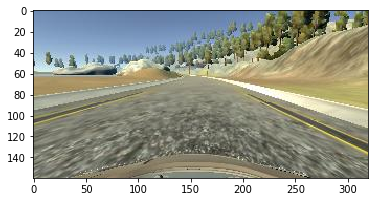

In [7]:
img = cv2.imread('new_data2\IMG\center_2018_11_10_20_11_09_705.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

# ProcessData

In [8]:
def preprocess_image(img):
    new_img = img[50:140,:,:]
    new_img = cv2.GaussianBlur(new_img, (3,3),0)
    new_img = cv2.resize(new_img,(200,66), interpolation = cv2.INTER_AREA)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2YUV)
    return new_img


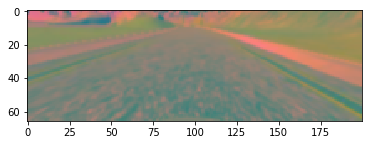

In [9]:
#Preprocess test
processed_im = preprocess_image(img)
plt.imshow(processed_im)

In [10]:
images = []
measurements = []
for i in range(3):
    for line in lines:
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = filename[8:]
        #print(current_path)
        #print(current_path[12:])
        image = preprocess_image(cv2.imread(current_path))
        image_flip = np.fliplr(image)
        images.append(image)
        images.append(image_flip)
        measurement = float(line[3])
        measurement_flip = -measurement
        measurements.append(measurement)
        measurements.append(measurement_flip)

    
    
X_train = np.array(images)
y_train = np.array(measurements)




Text(0.5, 1.0, 'steering example')

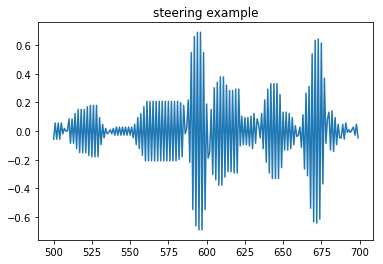

In [11]:
frames = range(500,700)
plt.plot(frames, y_train[frames])
plt.rcParams['figure.figsize'] = (10.0, 20.0)
plt.title('steering example')


In [12]:
print(X_train.shape)
print(y_train.shape[0])

(73668, 66, 200, 3)
73668


# Model Architecture

In [13]:
#model architecture uses End to End Learning for Self-Driving Carsby Mariusz Bojarski

model = Sequential()
model.add(Lambda(lambda x:x / 127.5 - 1.0, input_shape=(66,200,3)))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="elu", border_mode='valid', W_regularizer=l2(0.001)))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="elu", border_mode='valid', W_regularizer=l2(0.001)))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="elu", border_mode='valid', W_regularizer=l2(0.001)))
model.add(Convolution2D(64,3,3,activation="elu", border_mode='valid', W_regularizer=l2(0.001)))
model.add(Convolution2D(64,3,3,activation="elu", border_mode='valid', W_regularizer=l2(0.001)))
model.add(Flatten())
model.add(Dense(100, activation = "elu", W_regularizer=l2(0.001)))
model.add(Dense(50, activation = "elu", W_regularizer=l2(0.001)))
model.add(Dense(10, activation = "elu", W_regularizer=l2(0.001)))
model.add(Dense(1))
model.summary()
model.compile(loss = 'mse', optimizer = 'adam')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

C:\Users\HAKUSHO CHIN\AppData\Local\conda\conda\envs\tensorgpu2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  """
C:\Users\HAKUSHO CHIN\AppData\Local\conda\conda\envs\tensorgpu2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  
C:\Users\HAKUSHO CHIN\AppData\Local\conda\conda\envs\tensorgpu2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2), padding="valid", kernel_regularizer=<keras.reg...)`
  import sys
C:\Users\HAKUSHO CHIN\AppData\Local\conda\conda\envs\tensorgpu2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 A

# Train and Save Model

In [14]:
image_train, image_test, angles_train, angles_test = train_test_split(X_train, y_train,test_size=0.05, 
                                                                                  random_state=42)

print('Train:', image_train.shape, angles_train.shape)
print('Test:', image_test.shape, angles_test.shape)

Train: (69984, 66, 200, 3) (69984,)
Test: (3684, 66, 200, 3) (3684,)


In [ ]:
history = model.fit(image_train, angles_train, batch_size=128, nb_epoch=5, validation_split=0.2, verbose=2)
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

C:\Users\HAKUSHO CHIN\AppData\Local\conda\conda\envs\tensorgpu2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 55987 samples, validate on 13997 samples
Epoch 1/5
 - 200s - loss: 0.2438 - val_loss: 0.1078
Epoch 2/5
 - 25s - loss: 0.0827 - val_loss: 0.0710
Epoch 3/5
 - 24s - loss: 0.0670 - val_loss: 0.0649
Epoch 4/5


In [103]:
model.save('model.h5')